In [1]:
input_file_path = 'redcard.csv'

## This analysis was done by Sean Markert, and David Riebel.


### We split the players into light, medium, and dark skin tones. Though the location of the splits change the results, we find in our groupings, there is a highly significant difference in the number of red cards in the groups per player, via a $\chi^2$ test.

In [2]:
import numpy  as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from scipy.stats import chisquare

%matplotlib inline
plt.style.use( 'dark_background' )
plt.rcParams[ 'figure.figsize' ] = ( 14, 10 )

In [3]:
raw_df = pd.read_csv( input_file_path )

Create new dataframe with no null ratings, and determine average

In [4]:
null_rater   = raw_df[['rater1','rater2']].isnull().any( axis=1 )
nn_rating_df = raw_df.loc[ ~null_rater, : ].copy()

nn_rating_df['rating' ] = ( nn_rating_df['rater1'  ]+nn_rating_df['rater2'    ] ) / 2.
nn_rating_df['tot_red'] = ( nn_rating_df['redCards']+nn_rating_df['yellowReds'] )

Now let's turn this into something by player skin tone

In [5]:
player_group = nn_rating_df.groupby( ['playerShort'] )[['tot_red','rating']]\
    .agg({'tot_red':'sum','rating':'mean'}).reset_index()

rating_group_count = player_group.groupby( ['rating'] ).size()\
    .reset_index().rename(columns={0:'count'})

rating_group_red = player_group.groupby( ['rating'] )['tot_red'].sum()\
    .reset_index().rename(columns={0:'count'})

rating_group = pd.merge( 
    rating_group_count,
    rating_group_red,
    on='rating'
)

rating_group['red_per_player'] = rating_group['tot_red'] / rating_group['count']

In [6]:
rating_group

,rating,count,tot_red,red_per_player
0,0.000,424,761,1.794811
1,0.125,227,393,1.731278
2,0.250,472,1039,2.201271
3,0.375,77,174,2.259740
4,0.500,116,221,1.905172
5,0.625,33,38,1.151515
6,0.750,104,179,1.721154
7,0.875,40,73,1.825000
8,1.000,92,214,2.326087


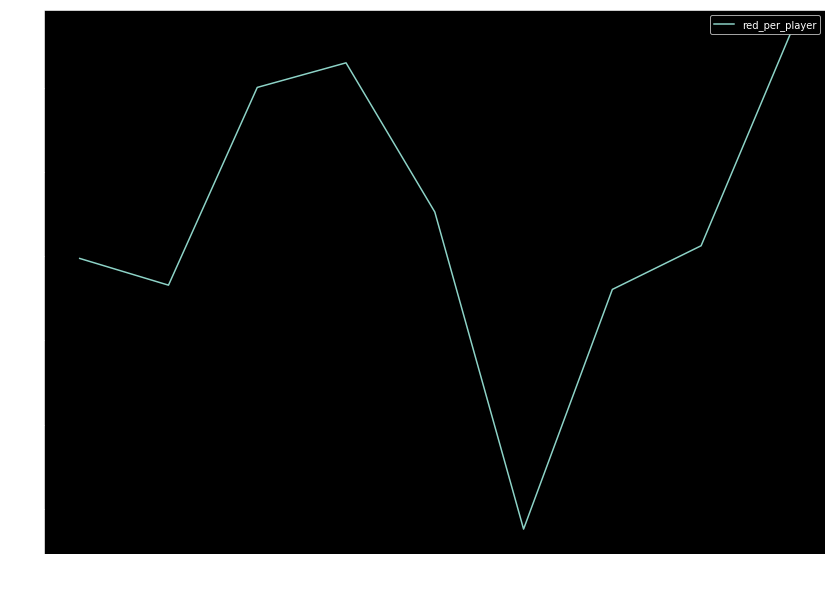

In [7]:
fig, ax = plt.subplots( figsize=(14,10) )
rating_group.plot.line( x='rating', y='red_per_player', linestyle='-', ax=ax )
plt.ylabel('red cards per player')
plt.show()

In [20]:
rating_group['skin'] = 'M'
rating_group.loc[ rating_group['rating'] < 0.25 , 'skin' ] = 'L'
rating_group.loc[ rating_group['rating'] > 0.375, 'skin' ] = 'D'

In [21]:
rating_group.head()

,rating,count,tot_red,red_per_player,skin
0,0.000,424,761,1.794811,L
1,0.125,227,393,1.731278,L
2,0.250,472,1039,2.201271,M
3,0.375,77,174,2.259740,M
4,0.500,116,221,1.905172,D


  skin  count  tot_red  red_per_player
0    D    385      725        1.883117
1    L    651     1154        1.772657
2    M    549     1213        2.209472


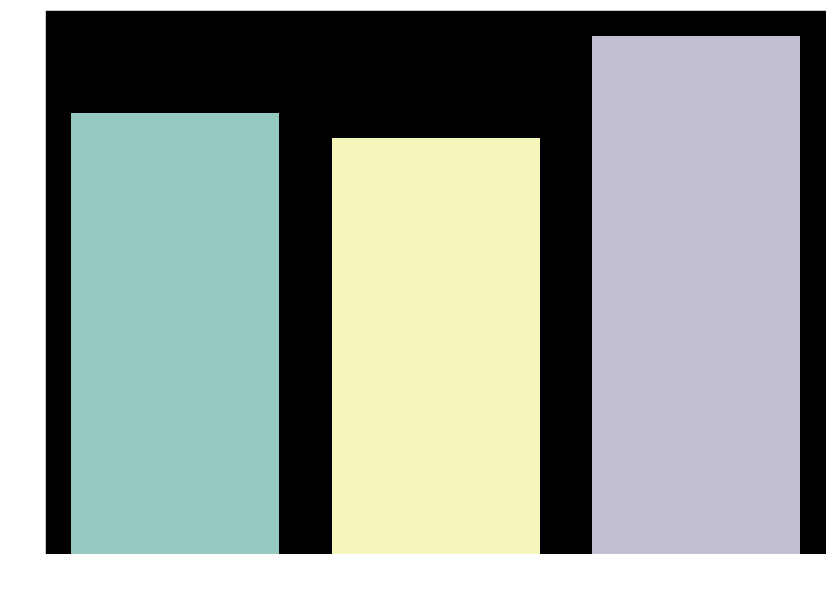

In [22]:
skin_group = rating_group.groupby( 'skin' ).agg({'count':'sum','tot_red':'sum'}).reset_index()
skin_group['red_per_player'] = skin_group['tot_red'] / skin_group['count'].astype(float)
print(skin_group)
fig, ax = plt.subplots( figsize=(14,10) )
sns.barplot( data=skin_group, x='skin', y='red_per_player', ax=ax )
plt.show()

In [23]:
obs = skin_group['tot_red'].values
exp = skin_group['tot_red'].sum()/skin_group['count'].sum().astype(float)
exp = np.array( [exp*skin_group['count'].values[0],
                 exp*skin_group['count'].values[1],
                 exp*skin_group['count'].values[2]] )

chi2, p = chisquare( obs, exp )

In [24]:
print( chi2 )
print( p )

30.324763898783743
2.600525920185037e-07


In [13]:
rating_group['skin'] = 'M'
rating_group.loc[ rating_group['rating'] < 0.25, 'skin' ] = 'L'
rating_group.loc[ rating_group['rating'] > 0.25, 'skin' ] = 'D'

In [14]:
rating_group.head()

,rating,count,tot_red,red_per_player,skin
0,0.000,424,761,1.794811,L
1,0.125,227,393,1.731278,L
2,0.250,472,1039,2.201271,M
3,0.375,77,174,2.259740,D
4,0.500,116,221,1.905172,D


  skin  count  tot_red  red_per_player
0    D    462      899        1.945887
1    L    651     1154        1.772657
2    M    472     1039        2.201271


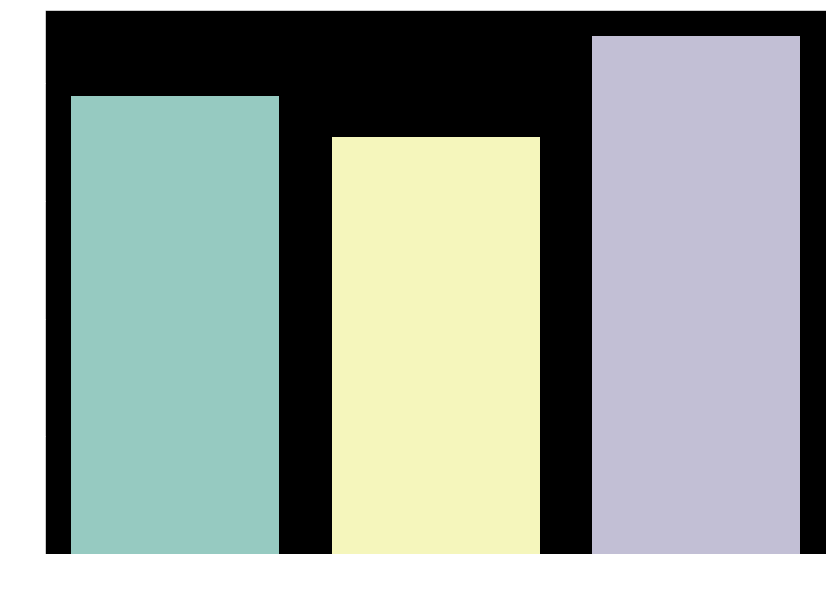

In [15]:
skin_group = rating_group.groupby( 'skin' ).agg({'count':'sum','tot_red':'sum'}).reset_index()
skin_group['red_per_player'] = skin_group['tot_red'] / skin_group['count'].astype(float)
print(skin_group)
fig, ax = plt.subplots( figsize=(14,10) )
sns.barplot( data=skin_group, x='skin', y='red_per_player', ax=ax )
plt.show()

In [18]:
obs = skin_group['tot_red'].values
exp = skin_group['tot_red'].sum()/skin_group['count'].sum().astype(float)
exp = np.array( [exp*skin_group['count'].values[0],
                 exp*skin_group['count'].values[1],
                 exp*skin_group['count'].values[2]] )

chi2, p = chisquare( obs, exp )

In [19]:
print( chi2 )
print( p )

25.775108090555673
2.5293352285174274e-06
